# ***EEE 4710 Open Ended Lab-02***
---
---
## Topic: NLP Sentiment analysis
---

Group Name : Team Yennefer

Group Members:
1. A.G.M. Fuad Hasan Akanda(190021209)
2. Rayan Hossain Khan (190021214)
3. Shadman Saqib (190021228)
---
Date of Submission: 12 Novemeber, 2023

# **Introduction**
Natural Language Processing (NLP) has emerged as a pivotal field within artificial intelligence, focusing on the interaction between computers and human language. Sentiment analysis, a subset of NLP, involves the extraction of emotional tone from written or spoken language. In an era dominated by vast amounts of textual data, sentiment analysis plays a crucial role in understanding public opinion, customer feedback, and social trends.

This project delves into the realm of sentiment analysis, seeking to leverage advanced NLP techniques to discern and interpret sentiments expressed in textual data. With an ever-growing volume of user-generated content on social media, product reviews, and online forums, the need for accurate and efficient sentiment analysis has become more pronounced than ever.

The primary objective is to discern and interpret sentiments within textual data, employing advanced NLP techniques. From the initial stage of library importation to the final model selection, every step is executed with precision. Through meticulous preprocessing and feature analysis, the project aims to contribute valuable insights to the field of sentiment analysis, offering a nuanced understanding of human emotion expressed through language.

# **Objectives**
1. Achieve high precision in sentiment classification.
2. Capture contextual nuances, including sarcasm and varying emotional intensity.
3. Prioritize interpretability and transparency in model predictions.
4. Generate publication-ready documentation for broader community contribution.
5. Develop a sentiment analysis model that appreciates linguistic elegance.
6. Implement an efficient preprocessing pipeline for standardized input.
7. Conduct insightful feature analysis to understand dataset patterns.
8. Utilize TF-IDF Vectorizer for impactful feature selection.
9. Evaluate five diverse models comprehensively for optimal performance.
10. Craft an artistic narrative, transcending traditional sentiment analysis.

# **Pipeline or Process Diagram**
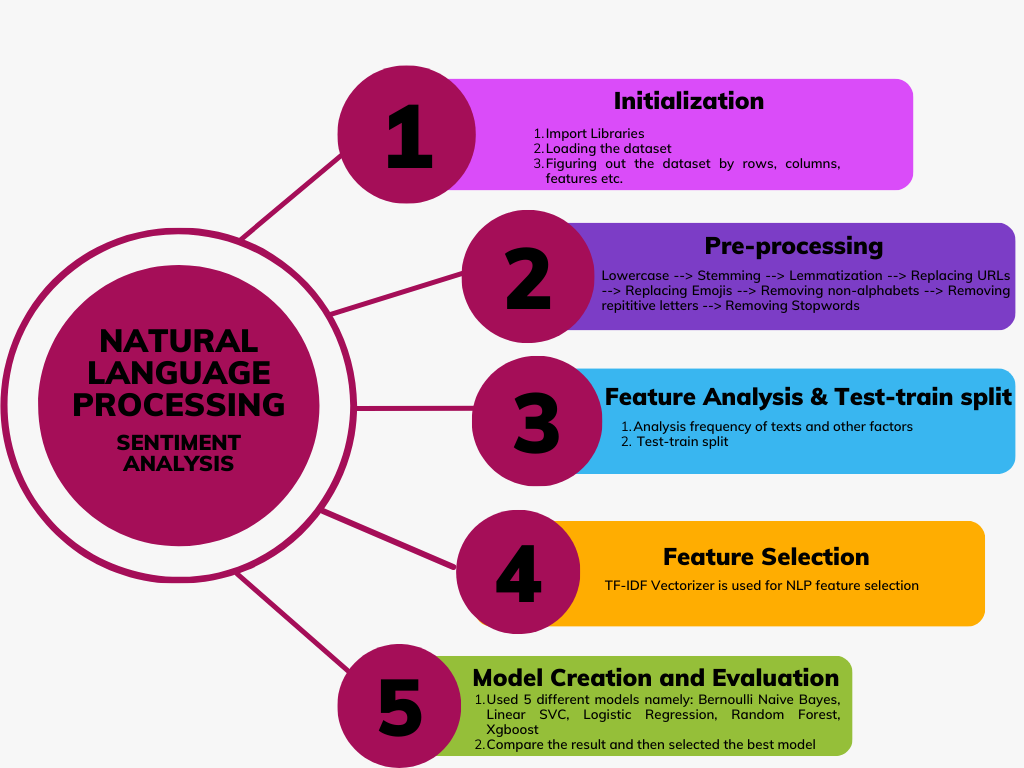

# Importing libraries
*  **Regular Expression (re):** Regular expressions, or regex, stand as a formidable tool in text processing, empowering users to adeptly manipulate and analyze strings with precision.
* **NumPy:** NumPy, a fundamental library for numerical operations in Python, provides a robust foundation for efficient handling of large, multi-dimensional arrays and matrices.
* **Pandas:** Pandas, a versatile data manipulation library, excels in providing data structures like DataFrames, facilitating seamless data analysis and manipulation.
* **Seaborn:** Seaborn, a statistical data visualization library built on Matplotlib, adds a layer of elegance to data representation, offering aesthetically pleasing and insightful visualizations.
* **Matplotlib:** Matplotlib, a cornerstone in data visualization, empowers users to create a diverse range of static, animated, and interactive plots, fostering a comprehensive understanding of data.
* **NLTK (Natural Language Toolkit):** NLTK, a robust library for NLP, encompasses tools and resources for text processing, enabling tasks such as tokenization, stemming, and part-of-speech tagging.
* **Scikit-learn (sklearn):**
Scikit-learn, a machine learning library, provides a user-friendly interface for various algorithms, making it a go-to choice for tasks ranging from classification to regression and clustering.
* **XGBoost:** XGBoost, an efficient and scalable gradient boosting library, stands as a potent tool for tackling diverse machine learning challenges, known for its speed and performance.

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the dataset
*   The dataset is not categorized, so, columns are categorized manually
*   ISO 8859-1 refers to "Latin alphabet no. 1", consisting of 191 characters from the Latin script



In [ ]:
df_col  = ["sentiment", "ids", "date", "flag", "user", "text"]
df_enc = "ISO-8859-1"
df=pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=df_enc , names=df_col)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*   sentiment: 0 for negative, 4 for positive sentiment
*   ids: ID for the tweer
* date: When it was tweeted
* flag: Query
* user: The person who tweeted
* text: The tweet itself


In [ ]:
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.tail()

,sentiment,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


Keeping only the necessary columns:

In [ ]:
df=df[['sentiment','text']]
df

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


Changing the value of positive sentiment from 4 to 1:

In [ ]:
df['sentiment'] = df['sentiment'].replace(4,1)
df

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


Plotting the two types of sentiments distribution:

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

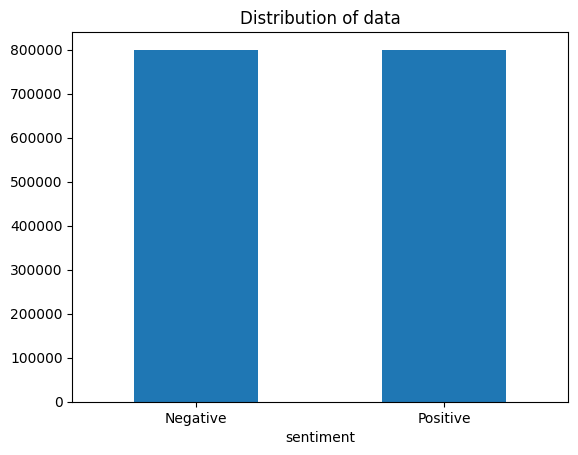

In [ ]:
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [ ]:
text, sentiment = list(df['text']), list(df['sentiment'])

In [ ]:
text[1]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

# Pre-processing

* Lowercase: Converting every letter into lowercase
* Stemming: Stemming is a process of reducing words to their root or base form by removing suffixes. It is a heuristic approach that is based on simple rules and patterns. The resulting word stem may not always be a valid word or a real word.
* Lemmatization:Lemmatization reduces words to their base or dictionary form, known as the lemma. It considers the context and part of speech of the word to determine the correct lemma, resulting in a valid word. We will be using this method to normalize our words.
* Replacing URLs: Links are replaced by 'URL' with regex
* Replacing Emojis: Emojis are replaced according to the dictionary declared
* Removing non-alphabets: Replacing characters except Digits and Alphabets with a space
* Removing repititive letters:  3 or more consecutive letters are replaced by 2 letters. eg, "Hiiii" to "Hii"
* Removing Stopwords: Commonly used words that are often filtered out or ignored during text analysis and processing because they are considered to be of little value in understanding the meaning of a text.

Lower case:

In [ ]:
for i in range(len(text)):
   text[i] = text[i].lower()

URL replacement:

In [ ]:
url = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
for i in range(len(text)):
    text[i] = re.sub(url,' URL',text[i])

Emojis with their meanings + replacement:

In [ ]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

for i in range(len(text)):
  for x in emojis.keys():
    text[i] = text[i].replace(x, "EMOJI" + emojis[x])

USER replacement

In [ ]:
users = '@[^\s]+'
for i in range(len(text)):
  text[i] = re.sub(users,' USER', text[i])

Replace non aphanumericals:

In [ ]:
aphanum = "[^a-zA-Z0-9]"
for i in range(len(text)):
  text[i] = re.sub(aphanum, " ", text[i])

Replacing 3 or more consecutive letters by 2 letters:


In [ ]:
seq   = r"(.)\1\1+"
seqrep = r"\1\1"
for i in range(len(text)):
  text[i] = re.sub(seq, seqrep, text[i])

Stopwords:

In [ ]:
stop_words = stopwords.words("english")

Lemmatizer:

In [ ]:
wordLemm = WordNetLemmatizer()
newtext=[]
for i in range(len(text)):
  tweetword=''
  for word in text[i].split():
    if word not in stop_words:
      word=wordLemm.lemmatize(word)
      tweetword=tweetword+(word+' ')
  newtext.append(tweetword)

In [ ]:
text[1]

'is upset that he can t update his facebook by texting it  and might cry as a result  school today also  blah '

In [ ]:
newtext[1]

'upset update facebook texting might cry result school today also blah '

# Analysis

Aalyzing the words in the pre-processed text. Bigger words are more frequent.

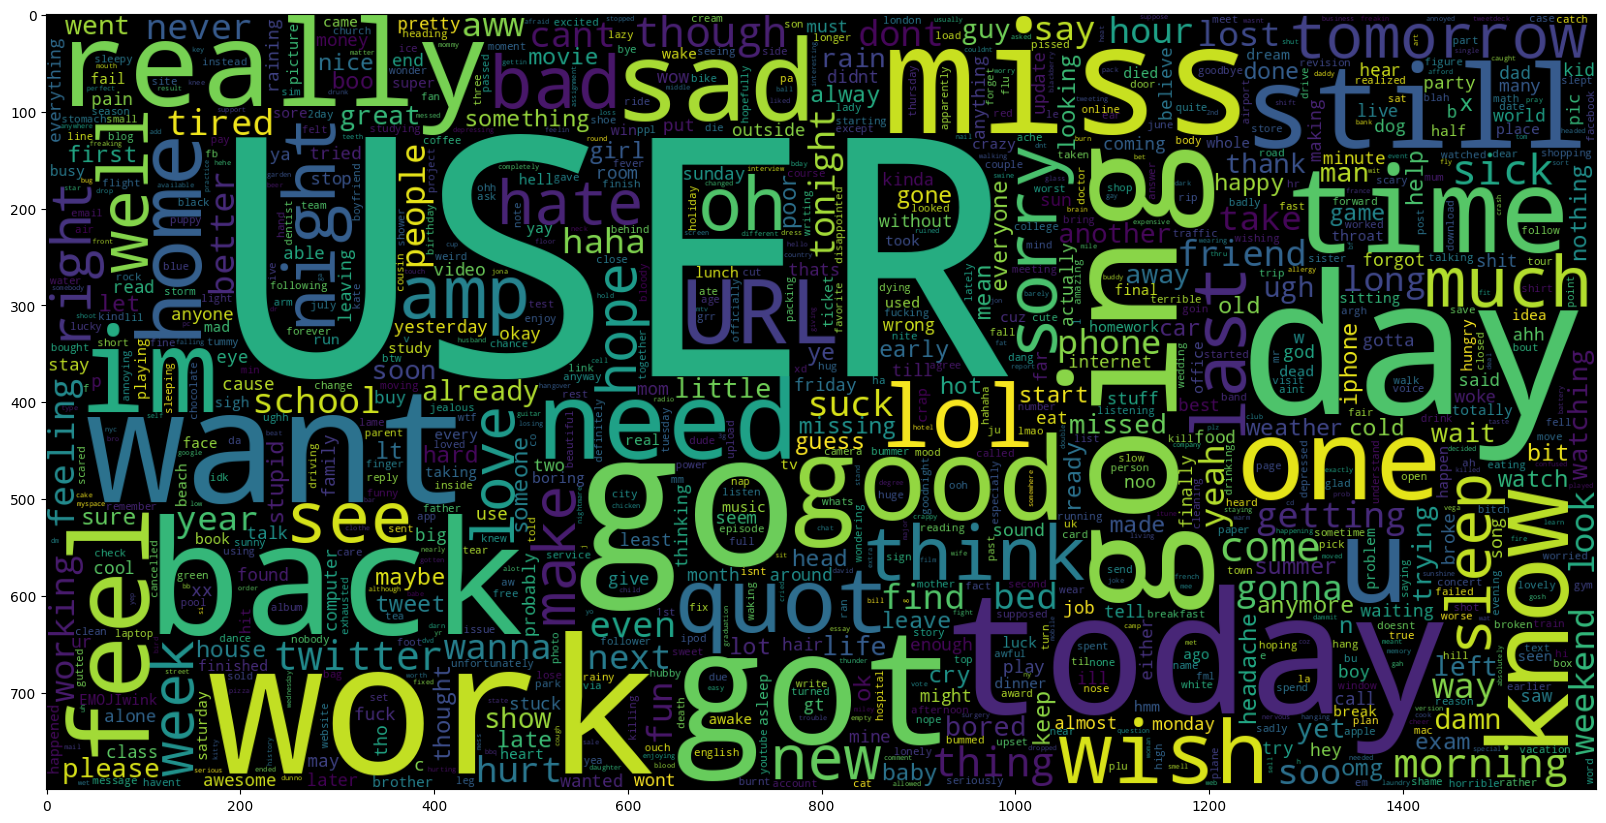

In [ ]:
data_neg = newtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

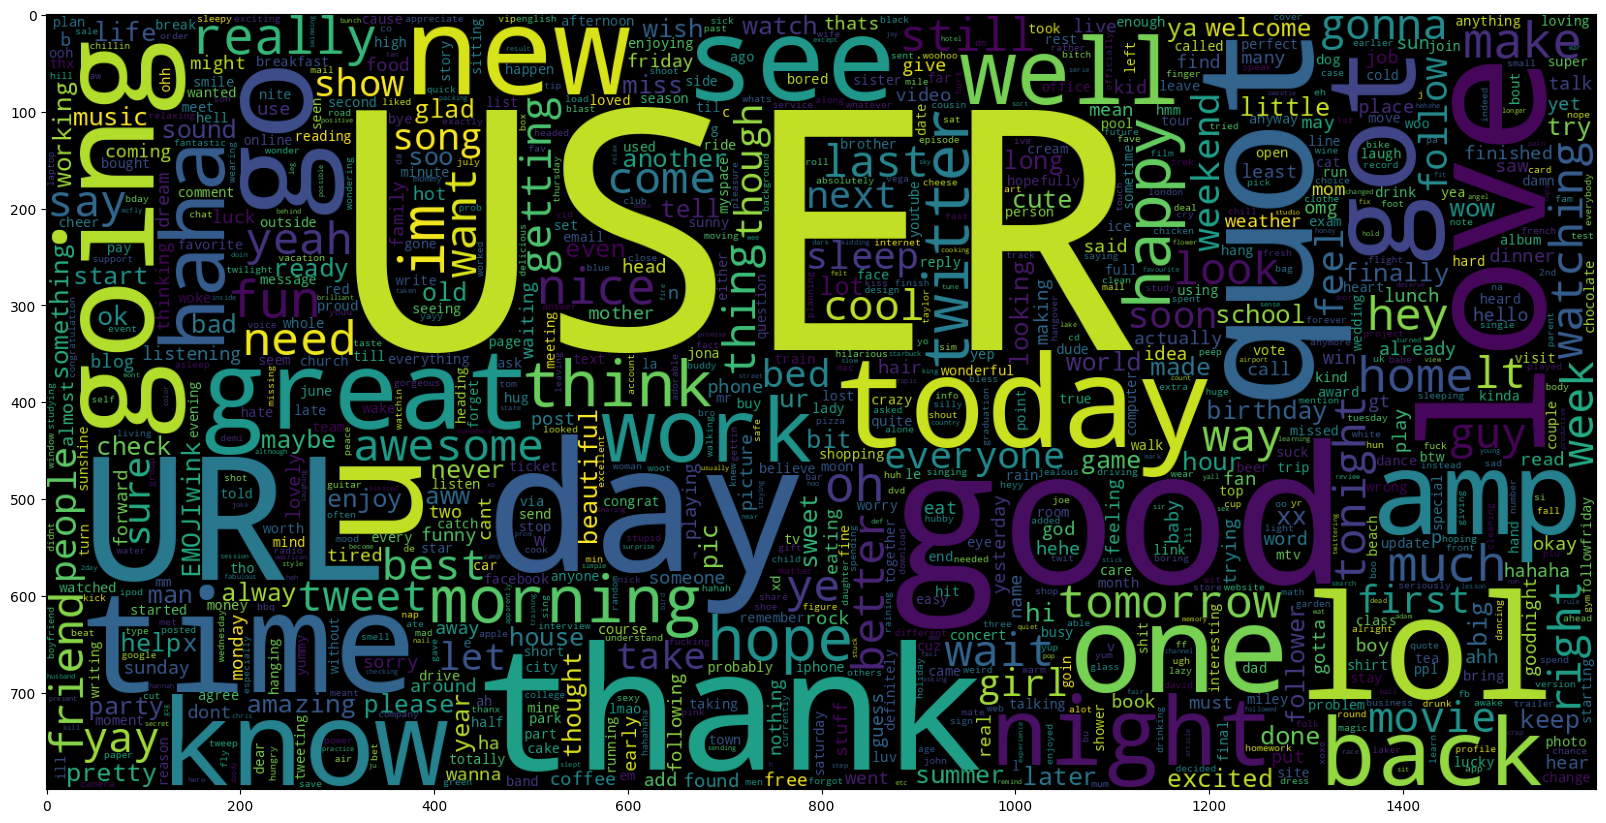

In [ ]:
data_pos = newtext[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

# Test-Train Split

Test and train data is divided into 9:1 ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(newtext, sentiment, test_size = 0.10, random_state = 45)

In [ ]:
len(X_train)

1440000

In [ ]:
len(X_test)

160000

# TF-IDF Vectorizer

TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a technique NLP used for text preprocessing and feature extraction. It is used to represent text documents as numerical vectors, making them suitable for machine learning algorithms. TF-IDF vectorization assigns a numerical value to each term (word or n-gram) in a document, indicating its importance within that document and across a collection of documents (corpus).


* **Term Frequency (TF)**: TF measures how frequently a term occurs in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in that document. The idea is that terms that appear more frequently within a document are more likely to be important in representing the content of that document.
* **Inverse Document Frequency (IDF)**: IDF measures how unique or rare a term is across the entire corpus of documents. It is calculated as the logarithm of the total number of documents in the corpus divided by the number of documents containing the term. The IDF value is higher for terms that appear in fewer documents and lower for terms that are common across many documents.
* **TF-IDF Calculation**: The TF-IDF score for a term in a document is calculated by multiplying its TF and IDF values. It represents the importance of the term in that specific document within the context of the entire corpus.
Terms that have high TF-IDF scores are those that are important and distinctive for a particular document but relatively rare across other documents.
* **Vectorization**: After calculating the TF-IDF scores for each term in a document, we can represent the document as a numerical vector where each term corresponds to a feature in the vector. The length of the vector is typically equal to the total number of unique terms in the corpus. Each element of the vector corresponds to the TF-IDF score of a specific term in the document.

This Vectorization is done on the X_train dataset



*   ngram_range: It is the range of the numbers of words in a sequence that considers a word as a separate feature. Like, with a (1,2) range, 'very good' is a separate feature drom 'very' and 'good'
*   max_features: maximum features to be considered

The vectorizer below is fitted with range of (1,2) and 500000 features.



In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

Now, the vectorizer is used to transform both the X_train and X_test dataset

In [ ]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

# Model Creation and Evaluation

We will be using 5 different models for our purpose:


1.   Bernoulli Naive Bayes
2.   Linear SVC
3.   Logistic Regression
4.   Random Forest
5.   Xgboost

The dataset is not imbalanced. So, getting the confusion matrix and Accuracy will be enough to evaluate the model.



Model function:

In [ ]:
def Evaluate_model(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     79839
           1       0.77      0.80      0.78     80161

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



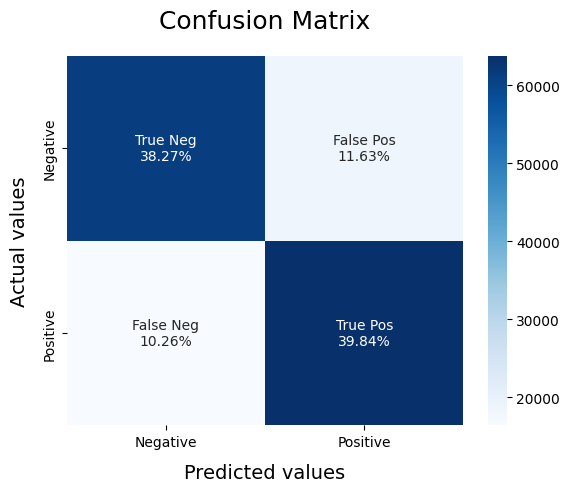

In [ ]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
Evaluate_model(BNBmodel)

# SVC

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     79839
           1       0.78      0.80      0.79     80161

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



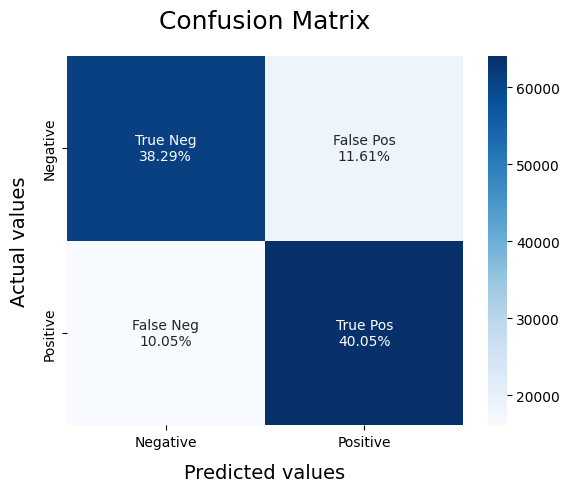

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
Evaluate_model(SVCmodel)

# Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     79839
           1       0.79      0.81      0.80     80161

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



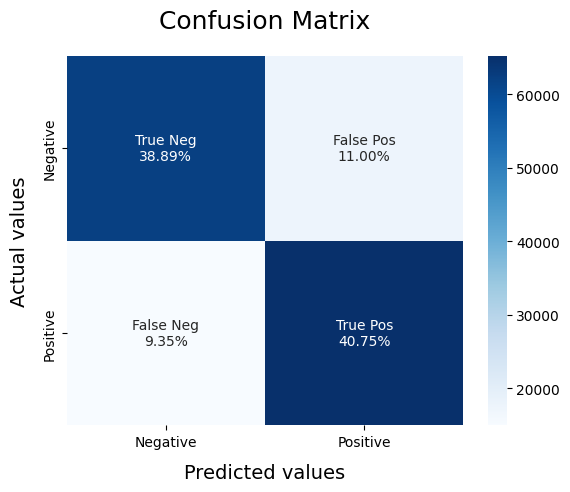

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
Evaluate_model(LRmodel)

# Random Forest

              precision    recall  f1-score   support

           0       0.72      0.73      0.72     79839
           1       0.73      0.71      0.72     80161

    accuracy                           0.72    160000
   macro avg       0.72      0.72      0.72    160000
weighted avg       0.72      0.72      0.72    160000



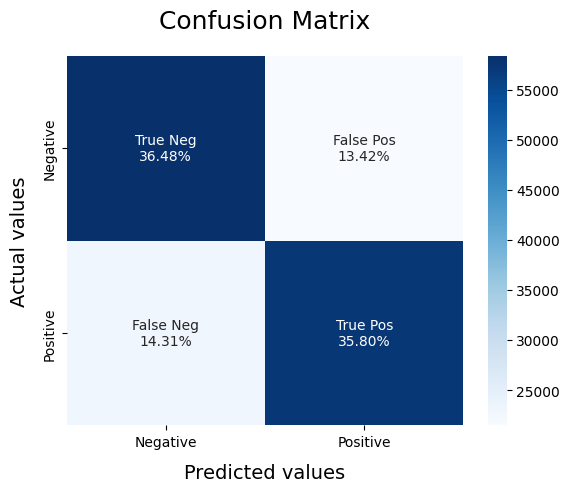

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, max_depth=30, random_state=42)
rf.fit(X_train, y_train)
Evaluate_model(rf)

# Xgboost

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     79839
           1       0.73      0.75      0.74     80161

    accuracy                           0.74    160000
   macro avg       0.74      0.74      0.74    160000
weighted avg       0.74      0.74      0.74    160000



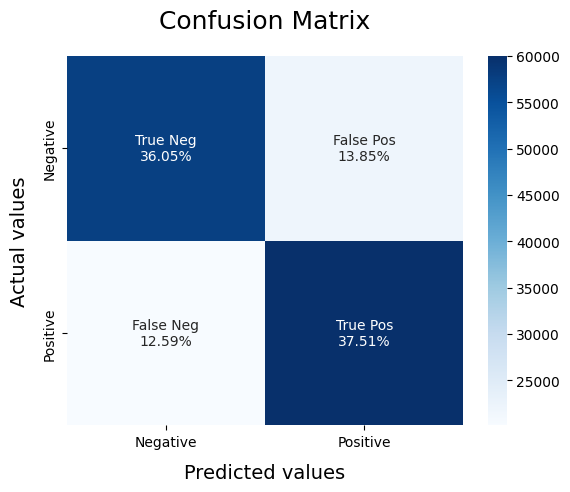

In [ ]:
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train, y_train)
Evaluate_model(xgb)

# Results

*   BernoulliNB Model trained in 4s to give 78% accuracy
*   LinearSVC Model trained in 57s to give 78% accuracy
*   Logistic Regression Model trained in 6m to give 80% accuracy
*   Random Forest trained in 4m to give 72% accuracy
*   Xgboost trained in 12m to give 74% accuracy


From the accuracy, it is clearly evident that the Logistic Regression model emerges as the top performer with the highest accuracy of 80%, despite a longer training duration. The BernoulliNB and LinearSVC models exhibit similar accuracy at 78%, with the former having a notably shorter training time of 4 seconds. The Random Forest model, trained in 4 minutes, achieves an accuracy of 72%. The XGBoost model, while taking 12 minutes to train, achieves an accuracy of 74%.

# Discussion
These outcomes underscore the nuanced decision-making process in model selection. The efficiency of BernoulliNB and LinearSVC makes them favorable for real-time sentiment analysis applications, emphasizing speed. Logistic Regression excels where precision is paramount, showcasing its potential for tasks demanding high accuracy. Random Forest emerges as a balanced choice, providing both efficiency and competitive accuracy. XGBoost, while requiring a longer training time, delivers robust performance, highlighting its suitability for applications where a meticulous approach to sentiment analysis is crucial.

The methodology employed in this evaluation leveraged a meticulous preprocessing pipeline, including techniques like stemming, lemmatization, and TF-IDF feature selection. This approach, combined with the comparative evaluation of diverse models, contributes novel insights to the field of sentiment analysis in NLP. The key novelty lies in the nuanced balance achieved between efficiency and accuracy, presenting a spectrum of choices for varied application requirements. This study advances the understanding of sentiment analysis methods, offering practical insights for the development of efficient and accurate NLP models.